## Linear Regression - ECommerce Sales Prediction 

In [146]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df=pd.read_csv('/content/Ecommerce Customers.csv')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [149]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2d3def790>,
      dtype=object)

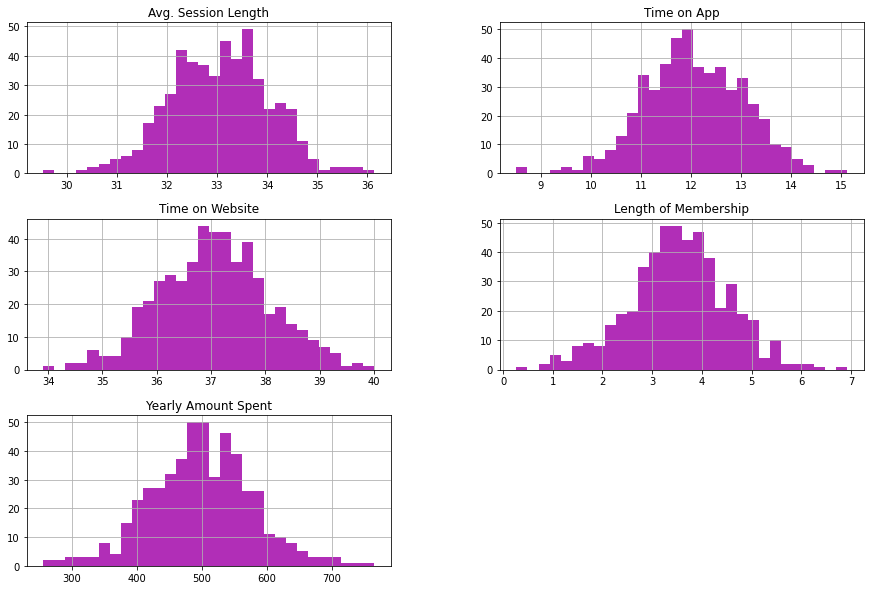

In [151]:
df.hist(bins=30, figsize=(15,10), color = "#B12EB7")

In [152]:
df.drop(columns=['Email','Address','Avatar'],axis=1,inplace=True)

In [153]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [154]:
cor = df.corr()
cor

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [155]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8090835682475804 -- 4 -- 3 -- Yearly Amount Spent -- Length of Membership


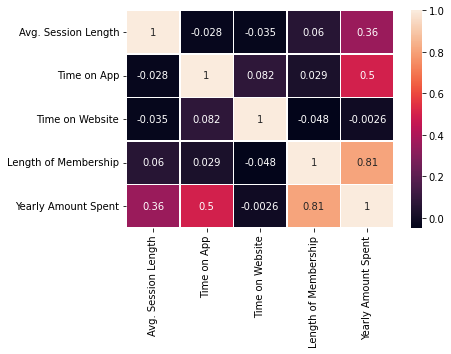

In [156]:
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

## Train-Test Split and Feature Scaling

In [157]:
df1=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

In [158]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 42)

In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numvars=['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
df_train[numvars] = scaler.fit_transform(df_train[numvars])

In [160]:
df_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
5,0.685642,0.531630,0.097770,0.785175,0.747634
116,0.694295,0.529227,0.483995,0.373306,0.437381
45,0.793851,0.553325,0.905970,0.510042,0.576184
16,0.409772,0.487353,0.170219,0.430832,0.395358
462,0.627608,0.411743,0.572574,0.308239,0.276605
...,...,...,...,...,...
106,0.436064,0.556339,0.388733,0.527887,0.467490
270,0.707047,0.672040,0.823313,0.451815,0.558763
348,0.360323,0.359394,0.170867,0.429705,0.267545
435,0.431041,0.849807,0.539984,0.524918,0.618152


In [161]:
y=df_train.pop('Yearly Amount Spent')
X=df_train

###Model Building

In [162]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
def build_model(Z,w):
    Z = sm.add_constant(Z) # Adding the constant
    lm = sm.OLS(w,Z.astype(float)).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm
    
def checkVIF(Z):
    vif = pd.DataFrame()
    vif['Features'] = Z.columns
    vif['VIF'] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [164]:
model1 = build_model(X, y)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Sun, 13 Feb 2022   Prob (F-statistic):          3.46e-315
Time:                         17:07:55   Log-Likelihood:                 885.07
No. Observations:                  350   AIC:                            -1760.
Df Residuals:                      345   BIC:                            -1741.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [165]:
X_train1=X.drop(['Time on Website'],axis=1)

In [166]:
model2 = build_model(X_train1, y)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     7771.
Date:                 Sun, 13 Feb 2022   Prob (F-statistic):          5.34e-317
Time:                         17:07:55   Log-Likelihood:                 884.67
No. Observations:                  350   AIC:                            -1761.
Df Residuals:                      346   BIC:                            -1746.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [167]:
checkVIF(X_train1)      ##Checking for multicollinearity

,Features,VIF
1,Time on App,9.04
0,Avg. Session Length,9.01
2,Length of Membership,8.57


### Feature Elimination using RFE


In [168]:
lm = LinearRegression()
lm.fit(X_train1,y)

rfe = RFE(lm,n_features_to_select=3)
rfe = rfe.fit(X_train1, y)

In [169]:
X_train1.columns[rfe.support_]

Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')

In [170]:
X_train_rfe = X_train1[X_train1.columns[rfe.support_]]
X_train_rfe.head()

,Avg. Session Length,Time on App,Length of Membership
5,0.685642,0.531630,0.785175
116,0.694295,0.529227,0.373306
45,0.793851,0.553325,0.510042
16,0.409772,0.487353,0.430832
462,0.627608,0.411743,0.308239


In [171]:
model4=build_model(X_train_rfe,y)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     7771.
Date:                 Sun, 13 Feb 2022   Prob (F-statistic):          5.34e-317
Time:                         17:07:55   Log-Likelihood:                 884.67
No. Observations:                  350   AIC:                            -1761.
Df Residuals:                      346   BIC:                            -1746.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

Text(0.5, 0, 'Error')

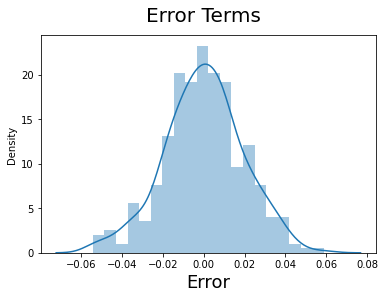

In [172]:
fig=plt.figure()
sns.distplot((y-y_train_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Error',fontsize=18)

In [173]:
X_train_rfe = sm.add_constant(X_train_rfe) # Adding the constant
y_train_pred = model4.predict(X_train_rfe)

###Prediction Using Test Data

In [174]:
df_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
361,32.077590,10.347877,39.045156,3.434560,401.033135
73,32.808698,12.817113,37.031539,3.851579,534.777188
374,31.447446,10.101632,38.043453,4.238296,418.602742
155,32.449522,13.457725,37.238806,2.941411,503.978379
104,31.389585,10.994224,38.074452,3.428860,410.069611
...,...,...,...,...,...
266,34.555283,11.777772,37.979827,3.784273,554.003093
23,32.903251,11.657576,36.772604,3.919302,519.340989
222,34.334865,11.109456,38.585855,3.892891,502.409785
261,32.550527,13.041245,36.655208,3.456234,514.009818


In [175]:
numvars=['Avg. Session Length','Time on App','Length of Membership','Yearly Amount Spent']
df_test1 = pd.DataFrame(scaler.fit_transform(df_test[numvars]),columns=numvars)

In [176]:
df_test1

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,0.293120,0.191067,0.499142,0.294388
1,0.420347,0.648409,0.578196,0.609081
2,0.183462,0.145458,0.651505,0.335729
3,0.357843,0.767061,0.405657,0.536613
4,0.173393,0.310781,0.498062,0.315651
...,...,...,...,...
145,0.724287,0.455906,0.565437,0.654319
146,0.436801,0.433644,0.591034,0.572761
147,0.685930,0.332123,0.586027,0.532923
148,0.375420,0.689922,0.503251,0.560217


In [177]:
y_test = df_test1.pop('Yearly Amount Spent')
X_test = df_test1

In [178]:
y_test

0      0.294388
1      0.609081
2      0.335729
3      0.536613
4      0.315651
         ...   
145    0.654319
146    0.572761
147    0.532923
148    0.560217
149    0.599645
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [179]:
X_test_new = pd.DataFrame(sm.add_constant(X_test))

In [180]:
X_test_new

,const,Avg. Session Length,Time on App,Length of Membership
0,1.0,0.293120,0.191067,0.499142
1,1.0,0.420347,0.648409,0.578196
2,1.0,0.183462,0.145458,0.651505
3,1.0,0.357843,0.767061,0.405657
4,1.0,0.173393,0.310781,0.498062
...,...,...,...,...
145,1.0,0.724287,0.455906,0.565437
146,1.0,0.436801,0.433644,0.591034
147,1.0,0.685930,0.332123,0.586027
148,1.0,0.375420,0.689922,0.503251


In [181]:
y_pred = model4.predict(X_test_new)

### Model Performance Comparisn between Train and Test (Generalisation)

In [182]:
from sklearn.metrics import r2_score 
print("Test Prediction R-Sqrd: ", r2_score(y_test, y_pred))

Test Prediction R-Sqrd:  0.8213836035854234


In [183]:
print("Train Prediction R-Sqrd: ", r2_score(y, y_train_pred))

Train Prediction R-Sqrd:  0.9853755659819254


Text(0.5, 0, 'Error')

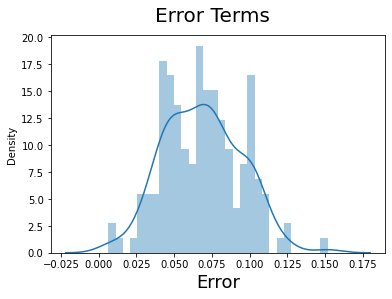

In [184]:
fig=plt.figure()
sns.distplot((y_test-y_pred),bins=30)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Error',fontsize=18)

Text(0.5, 0, 'y_test')

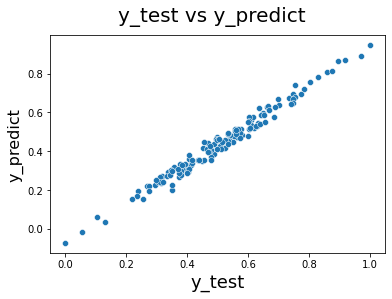

In [185]:
fig=plt.figure()
sns.scatterplot(y_test,y_pred)
fig.suptitle('y_test vs y_predict',fontsize=20)
plt.ylabel('y_predict',fontsize=16)
plt.xlabel('y_test',fontsize=18)

### Residual Normality

<Figure size 576x432 with 0 Axes>

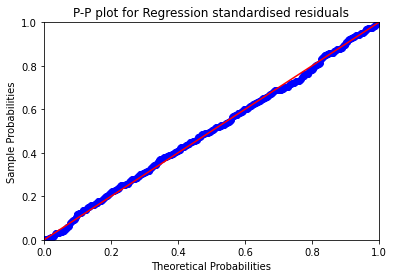

In [186]:
residual=model4.resid
residual
probplot=sm.ProbPlot(residual)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title('P-P plot for Regression standardised residuals')
plt.show()

Test of Homoscedasticity

Text(0, 0.5, 'Standardised Residuals')

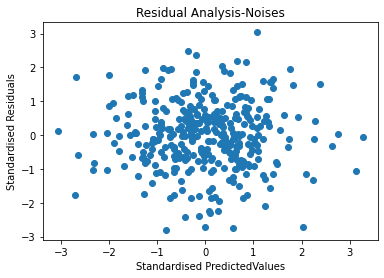

In [187]:
def get_standard_values(parm):
    return (parm-parm.mean())/parm.std()

plt.scatter(get_standard_values(model4.fittedvalues),get_standard_values(residual))
plt.title('Residual Analysis-Noises')
plt.xlabel('Standardised PredictedValues')
plt.ylabel('Standardised Residuals')

##Final Model

In [188]:
print(model4.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     7771.
Date:                 Sun, 13 Feb 2022   Prob (F-statistic):          5.34e-317
Time:                         17:08:54   Log-Likelihood:                 884.67
No. Observations:                  350   AIC:                            -1761.
Df Residuals:                      346   BIC:                            -1746.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 